In [2]:
%matplotlib inline
import numpy as n
import matplotlib.pyplot as p
sParamDir='../data/sParameters/'
impedDir='../data/impedances/'

In [3]:
def loadS11_cst(fbase):
    amp=n.loadtxt(sParamDir+fbase+'_amp.txt',skiprows=2)
    frq=amp[:,0]
    amp=10.**(amp[:,1]/10.)
    pha=n.radians(n.loadtxt(sParamDir+fbase+'_pha.txt',skiprows=2)[:,1])
    return frq,amp*n.exp(1j*pha)

def s112z(s11,zr):
    return zr*(1-s11)/(1+s11)

In [4]:
freqs,s11BackPlane=loadS11_cst('s11_paper_dipole_noCylinder')
_,s11CylinderBackPlane=loadS11_cst('s11_paper_dipole_cylinder_backplane')
_,s11DipoleOnly=loadS11_cst('s11_paper_dipole_bareDipole')
_,s11Paneled=loadS11_cst('s11_paper_dipole_paneledCylinder')

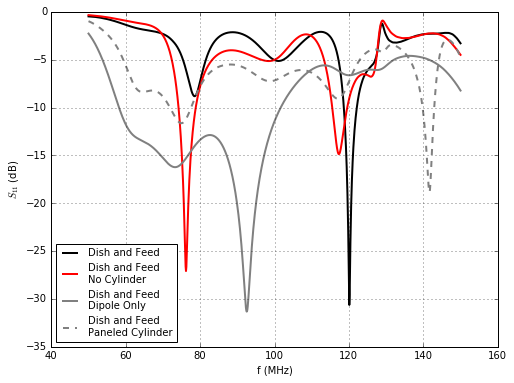

In [8]:
p.plot(freqs,10.*n.log10(n.abs(s11CylinderBackPlane)),color='k',lw=2,label='Dish and Feed')
p.plot(freqs,10.*n.log10(n.abs(s11BackPlane)),color='r',lw=2,label='Dish and Feed\nNo Cylinder')
p.plot(freqs,10.*n.log10(n.abs(s11DipoleOnly)),color='grey',lw=2,label='Dish and Feed\nDipole Only')
p.plot(freqs,10.*n.log10(n.abs(s11Paneled)),color='grey',lw=2,label='Dish and Feed\nPaneled Cylinder',ls='--')



p.legend(loc='best',fontsize=10)
p.grid()
p.gcf().set_size_inches([8,6])
p.xlabel('f (MHz)')
p.ylabel('$S_{11}$ (dB)')

p.savefig('../analysis/s11_comparison.pdf')

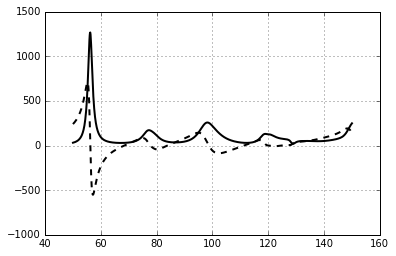

In [6]:
zant = s112z(s11CylinderBackPlane,125.)
p.plot(freqs,n.real(zant),color='k',ls='-',lw=2)
p.plot(freqs,n.imag(zant),color='k',ls='--',lw=2)
p.grid()